In [10]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')


## For df1:

- Take a look at the data in df1.
- Does x increase from time one to time two?
- Visualize the relationship between x and time.
- Run a statistical test to further examine the relationship between these features.

In [11]:
df1

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one
...,...,...,...
195,b,9.308194,two
196,a,3.931530,two
197,a,3.385066,two
198,b,8.247980,two


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   200 non-null    object 
 1   x       200 non-null    float64
 2   time    200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


NameError: name 'x' is not defined

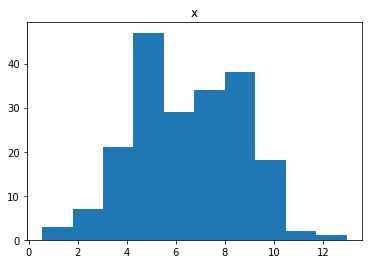

In [37]:
df1.hist(grid=False, bins=10)
sns.displot(x, time)
sns.boxplot(time)

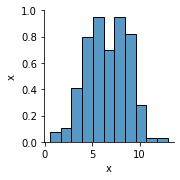

In [17]:
sns.pairplot(df1)

<AxesSubplot:>

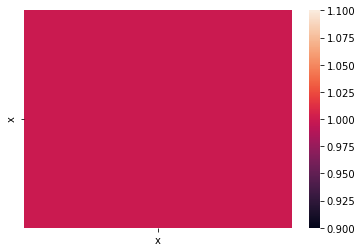

In [22]:
sns.heatmap(df1.corr())

In [44]:
df1.groupby('time').x.mean()

time
one    5.726669
two    7.296448
Name: x, dtype: float64

In [45]:
df1.pivot_table('x', 'group', 'time')

time,one,two
group,,
a,5.084092,2.936197
b,10.026997,8.065904


In [46]:
pd.crosstab(df1.group, df1.time)

time,one,two
group,,
a,87,15
b,13,85


## For df2:

- Take a look at the data in df2.
- Visualize the relationship between x and y.
- How would you describe the relationship between x and y?
- Run a statistical test to examine the relationship between x and y.

In [4]:
df2

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a
...,...,...,...
195,109.263191,647.120801,d
196,108.898932,640.437291,d
197,109.539255,629.554555,d
198,105.879511,647.396688,d


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
 2   group   200 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

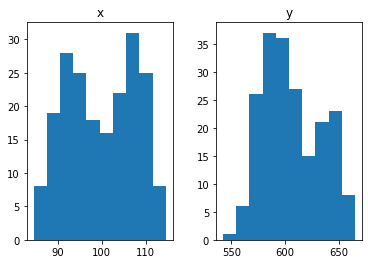

In [29]:
df2.hist(grid=False, bins=10)


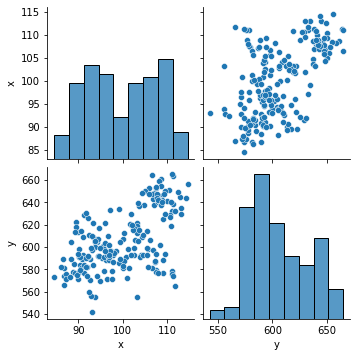

In [33]:
sns.pairplot(df2)

<AxesSubplot:xlabel='x', ylabel='y'>

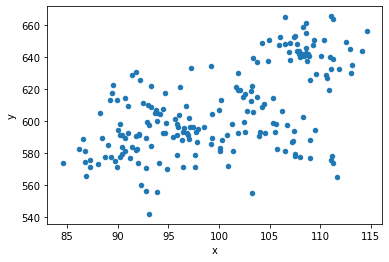

In [47]:
df2.plot.scatter('x', 'y')

<AxesSubplot:>

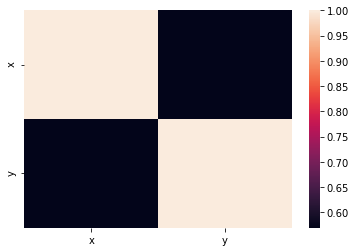

In [35]:
sns.heatmap(df2.corr())

In [53]:
df2.corr()

,x,y
x,1.00000,0.56939
y,0.56939,1.00000


## For df3:

- Take a look at the data in df3
- Which surgeon has the higher success rate?
- If you had to have heart bypass surgery, which surgeon would you go to?

In [5]:
df3

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1
...,...,...,...
995,A,appendectomy,1
996,B,heart bypass,1
997,B,heart bypass,0
998,A,heart bypass,0


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   surgeon  1000 non-null   object
 1   surgery  1000 non-null   object
 2   success  1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [51]:
df3.pivot_table('success', 'surgeon', 'surgery')

surgery,appendectomy,heart bypass
surgeon,,
A,0.934383,0.656566
B,0.931373,0.672249


In [52]:
df3.corr()

,success
success,1.0


### For df1 and df2, what happens to the relationships if you take into account the group feature?